
Final Perceptron Weights: [-0.8833599  -0.33186786  0.96465465  1.52801171 -1.11666046]
Final Perceptron Predictions: [0, 1, 1, 0]
Final Perceptron Accuracy: 100.00%


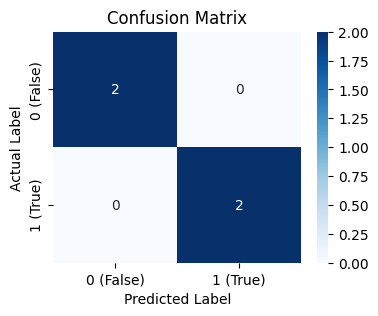

In [1]:
"""Program to implement a multi-layer perceptron (MLP) network with one hidden layer using numpy
 in Python using the demostration that it can learn the XOR Boolean function."""

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

class Perceptron:
    """
    A simple Perceptron classifier for binary classification.
    """
    def __init__(self, input_size, learning_rate=0.1, epochs=100):
        """
        Initialize the Perceptron with random weights, learning rate, and epochs.
        
        Parameters:
        input_size (int): Number of input features.
        learning_rate (float): Step size for weight updates.
        epochs (int): Number of training iterations.
        """
        self.weights = np.random.randn(input_size + 1)  # +1 for bias term
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation(self, x):
        """
        Activation function (step function) that returns 1 if x >= 0, else 0.
        """
        return 1 if x >= 0 else 0

    def predict(self, x):
        """
        Predict the class label for a given input.
        
        Parameters:
        x (array): Input feature vector.
        
        Returns:
        int: Predicted label (0 or 1).
        """
        x = np.insert(x, 0, 1)  # Add bias term
        return self.activation(np.dot(self.weights, x))

    def train(self, X, y):
        """
        Train the Perceptron using the Perceptron learning rule.
        
        Parameters:
        X (array): Feature matrix (samples x features).
        y (array): Target labels.
        """
        X = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias column
        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                y_pred = self.activation(np.dot(self.weights, X[i]))
                if y[i] == 1 and y_pred == 0:
                    self.weights += self.learning_rate * X[i]  # Update weights for false negative
                elif y[i] == 0 and y_pred == 1:
                    self.weights -= self.learning_rate * X[i]  # Update weights for false positive

    def evaluate(self, X, y):
        """
        Evaluate the model by computing accuracy.
        
        Parameters:
        X (array): Feature matrix.
        y (array): True labels.
        
        Returns:
        tuple: Accuracy and predicted labels.
        """
        y_pred = [self.predict(x) for x in X]
        accuracy = sum(y_pred[i] == y[i] for i in range(len(y))) / len(y)
        return accuracy, y_pred

    def compute_confusion_matrix(self, X, y):
        """
        Compute the confusion matrix.
        
        Parameters:
        X (array): Feature matrix.
        y (array): True labels.
        
        Returns:
        array: Confusion matrix.
        """
        y_pred = [self.predict(x) for x in X]
        return confusion_matrix(y, y_pred)

# Define input and expected output for different functions
fun1_X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
fun1_y = np.array([0, 0, 0, 1])  # AND function

# Train and evaluate Perceptron for fun1
fun1_perceptron = Perceptron(input_size=2)
fun1_perceptron.train(fun1_X, fun1_y)
fun1_accuracy, fun1_predictions = fun1_perceptron.evaluate(fun1_X, fun1_y)

fun2_X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
fun2_y = np.array([0, 0, 1, 0])  # Custom function

# Train and evaluate Perceptron for fun2
fun2_perceptron = Perceptron(input_size=2)
fun2_perceptron.train(fun2_X, fun2_y)
fun2_accuracy, fun2_predictions = fun2_perceptron.evaluate(fun2_X, fun2_y)

fun3_X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
fun3_y = np.array([0, 1, 0, 0])  # Custom function

# Train and evaluate Perceptron for fun3
fun3_perceptron = Perceptron(input_size=2)
fun3_perceptron.train(fun3_X, fun3_y)
fun3_accuracy, fun3_predictions = fun3_perceptron.evaluate(fun3_X, fun3_y)

fun4_X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
fun4_y = np.array([1, 0, 0, 0])  # Custom function

# Train and evaluate Perceptron for fun4
fun4_perceptron = Perceptron(input_size=2)
fun4_perceptron.train(fun4_X, fun4_y)
fun4_accuracy, fun4_predictions = fun4_perceptron.evaluate(fun4_X, fun4_y)

# Combine outputs from previous perceptrons as input for the final perceptron
final_X = np.array([fun1_predictions, fun2_predictions, fun3_predictions, fun4_predictions])
final_y = np.array([0, 1, 1, 0])  # Final expected output

# Train and evaluate Perceptron for final function
final_perceptron = Perceptron(input_size=4)
final_perceptron.train(final_X, final_y)
final_accuracy, final_predictions = final_perceptron.evaluate(final_X, final_y)

# Print the final learned weights and predictions
print(f"\nFinal Perceptron Weights: {final_perceptron.weights}")
print(f"Final Perceptron Predictions: {final_predictions}")
print(f"Final Perceptron Accuracy: {final_accuracy * 100:.2f}%")

# Compute and visualize the confusion matrix
cm = confusion_matrix(final_y, final_predictions)
title = "Confusion Matrix"
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0 (False)", "1 (True)"], yticklabels=["0 (False)", "1 (True)"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title(title)
plt.show()
